In [2]:
!pip install silence_tensorflow

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.1-py3-none-any.whl size=4465 sha256=ee676ea8556b955425805943f99e7e3b550ddf7e211f0a6303c7d3c8a0a0245d
  Stored in directory: /root/.cache/pip/wheels/7d/2c/24/e130d6102c0df56631b9db7479d9a6a53c5d97fb06b5f61b98
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=c959ddb39e39aa0fc7ac2a0548dc801dfbf3144e2f21da633aeee4a36d4c8331
  Stored in directory: /root/.cache/pip/wheels/b6/72/c8/3054a5897ba0713dfa7a941364d68cbd42b0755c8e2ec1c18c
Successfully built silence_tensorflow support_developer


In [3]:
from silence_tensorflow import auto
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt


In [5]:
tfd = tfp.distributions

In [6]:
plt.ion()

In [10]:
def exponential_normal_model(lamb, sigma):
  Z = yield tfd.JointDistributionCoroutine.Root(
      tfd.Exponential(
          rate=lamb,
          force_probs_to_zero_outside_support = True,
          name = "latent_mu"
      )
  )

  X = yield tfd.Normal(
      loc = Z,
      scale = sigma,
      name = "observed",
  )

In [11]:
joint_pdf = tfd.JointDistributionCoroutine(
    lambda : exponential_normal_model(lamb = 1.0, sigma = 1.0)
)

In [12]:
joint_pdf

<tfp.distributions.JointDistributionCoroutine 'JointDistributionCoroutine' batch_shape=StructTuple(
  latent_mu=[],
  observed=[]
) event_shape=StructTuple(
  latent_mu=[],
  observed=[]
) dtype=StructTuple(
  latent_mu=float32,
  observed=float32
)>

In [13]:
joint_pdf.sample()

StructTuple(
  latent_mu=<tf.Tensor: shape=(), dtype=float32, numpy=0.6020125>,
  observed=<tf.Tensor: shape=(), dtype=float32, numpy=0.8797139>
)

In [14]:
observed_data_point = 1.5

In [15]:
observed_data_point = 1.3

In [16]:
joint_fixed_to_data = lambda Z:joint_pdf.prob(Z, observed_data_point)

In [17]:
joint_fixed_to_data(2.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.042258956>

In [18]:
joint_fixed_to_data(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.17136852>

In [20]:
Z_range = tf.cast(tf.linspace(-5,5,1000), tf.float32)

In [21]:
prob_range = joint_fixed_to_data(Z_range)

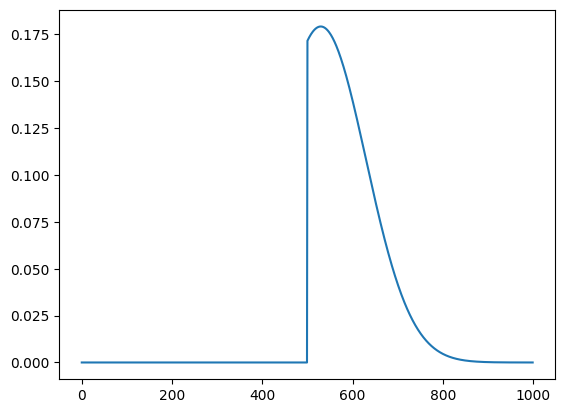

In [22]:
plt.plot(prob_range)

In [23]:
from scipy import integrate

In [24]:
integrate.trapezoid(x=Z_range, y=prob_range)

0.27764502

In [25]:
optimal_surrogate_parameter = -(observed_data_point-1)/2 + tf.sqrt((observed_data_point-1)**2/4 +2)

In [26]:
optimal_surrogate_parameter

<tf.Tensor: shape=(), dtype=float32, numpy=1.2721463>

In [27]:
surrogate_posterior = tfd.Exponential(rate = optimal_surrogate_parameter)

In [28]:
surrogate_prob_range = surrogate_posterior.prob(Z_range)

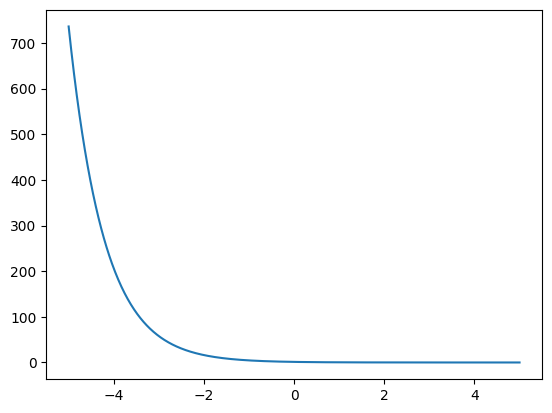

In [29]:
plt.plot(Z_range, surrogate_prob_range)

In [30]:
surrogate_posterior = tfd.Exponential(rate = optimal_surrogate_parameter, force_probs_to_zero_outside_support=True)

In [31]:
surrogate_prob_range = surrogate_posterior.prob(Z_range)

In [32]:
plt.clf()

<Figure size 640x480 with 0 Axes>

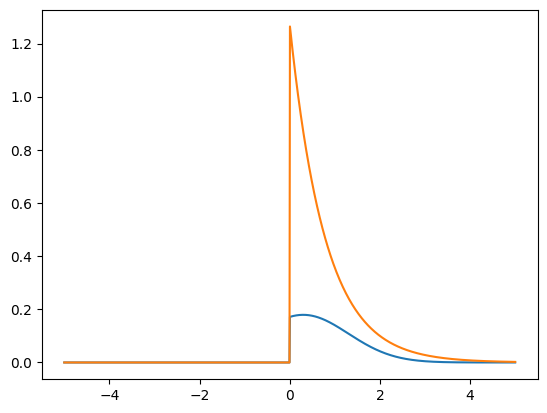

In [35]:
plt.plot(Z_range, prob_range)
plt.plot(Z_range, surrogate_prob_range)